In [36]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro, pearsonr
from scipy.stats import shapiro, mannwhitneyu
# Import required libraries
from scipy.stats import shapiro


# Load the processed dataset (output of Phase 2)
diabetes = pd.read_csv("diabetes_joined_data.csv", sep=",", encoding="utf-8")

# Select specific columns for analysis
columns_of_interest = [
    "DUPERSID", "SEX", "AGE19X", "INJURY", "RACETHX", "RACEV1X", "RACEV2X", 
    "FAMINC19", "TTLP19X", "UNEMP19X", "WAGEP19X", "ADAPPT42", "ADHECR42", 
    "ADHDAGED", "ADSPCL42"
]
diabetes_selected = diabetes[columns_of_interest]
diabetes_selected



,DUPERSID,SEX,AGE19X,INJURY,RACETHX,RACEV1X,RACEV2X,FAMINC19,TTLP19X,UNEMP19X,WAGEP19X,ADAPPT42,ADHECR42,ADHDAGED,ADSPCL42
0,2320012102,2,79,2,2,1,1,87411,87411,0,0,2,10,-1,2
1,2320019104,1,46,2,1,1,1,121260,101340,0,100340,0,-1,-1,1
2,2320022102,2,52,2,2,1,1,40366,11340,0,0,2,7,-1,2
3,2320034101,2,54,2,1,1,1,80600,37000,0,37000,-1,-1,-1,-1
4,2320040101,1,61,2,2,1,1,73997,73997,0,56000,4,9,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,2469619102,2,74,2,2,1,1,84000,42000,0,0,3,8,-1,1
2504,2469636101,1,72,2,3,2,2,115765,115765,4789,69992,5,8,-1,1
2505,2469637101,1,50,2,2,1,1,159019,90002,0,90002,3,6,-1,2
2506,2469650101,1,54,2,2,1,1,12804,12804,0,0,6,8,-1,2


In [37]:
# Descriptive Analysis
print("\nDescriptive Statistics for Continuous Variables:")
print(diabetes_selected.describe())



Descriptive Statistics for Continuous Variables:
           DUPERSID          SEX       AGE19X  INJURY      RACETHX  \
count  2.508000e+03  2508.000000  2508.000000  2508.0  2508.000000   
mean   2.393519e+09     1.505981    61.467703     2.0     2.206938   
std    6.995296e+07     0.500064    16.711737     0.0     0.962728   
min    2.320012e+09     1.000000    -1.000000     2.0     1.000000   
25%    2.325103e+09     1.000000    54.000000     2.0     2.000000   
50%    2.329462e+09     2.000000    64.000000     2.0     2.000000   
75%    2.464602e+09     2.000000    73.000000     2.0     3.000000   
max    2.469668e+09     2.000000    85.000000     2.0     5.000000   

           RACEV1X      RACEV2X       FAMINC19        TTLP19X     UNEMP19X  \
count  2508.000000  2508.000000    2508.000000    2508.000000  2508.000000   
mean      1.541866     1.919059   58259.481659   31513.537879    61.461324   
std       1.121748     2.429588   56811.336623   35290.522783   547.918017   
min    

In [38]:
print("\nCounts for Categorical Variables:")
categorical_vars = ["SEX", "INJURY", "RACETHX", "RACEV1X", "RACEV2X", "ADSPCL42"]
for var in categorical_vars:
    print(f"\n{var} Value Counts:\n", diabetes_selected[var].value_counts())


Counts for Categorical Variables:

SEX Value Counts:
 2    1269
1    1239
Name: SEX, dtype: int64

INJURY Value Counts:
 2    2508
Name: INJURY, dtype: int64

RACETHX Value Counts:
 2    1311
1     508
3     461
4     118
5     110
Name: RACETHX, dtype: int64

RACEV1X Value Counts:
 1    1783
2     474
4     134
6      83
3      34
Name: RACEV1X, dtype: int64

RACEV2X Value Counts:
 1     1783
2      474
12      83
10      62
3       34
6       31
4       27
5       14
Name: RACEV2X, dtype: int64

ADSPCL42 Value Counts:
  1    1394
 2     727
-1     387
Name: ADSPCL42, dtype: int64


In [39]:
# New Detailed Descriptive Analysis: Mean, Median, Mode
continuous_vars = ["AGE19X", "FAMINC19", "TTLP19X", "WAGEP19X", "ADAPPT42", "ADHECR42"]
print("\nDetailed Descriptive Analysis:")
for var in continuous_vars:
    mean_val = diabetes_selected[var].mean()
    median_val = diabetes_selected[var].median()
    mode_val = diabetes_selected[var].mode()[0]
    print(f"{var} - Mean: {mean_val:.2f}, Median: {median_val:.2f}, Mode: {mode_val}")


Detailed Descriptive Analysis:
AGE19X - Mean: 61.47, Median: 64.00, Mode: 85
FAMINC19 - Mean: 58259.48, Median: 40283.00, Mode: 0
TTLP19X - Mean: 31513.54, Median: 20029.00, Mode: 0
WAGEP19X - Mean: 16418.59, Median: 0.00, Mode: 0
ADAPPT42 - Mean: 2.21, Median: 3.00, Mode: -1
ADHECR42 - Mean: 5.59, Median: 8.00, Mode: 10


In [40]:
# Normality check (Shapiro-Wilk test for normality)
from scipy.stats import shapiro

# Separate ages by sex
male_ages = diabetes_selected[diabetes_selected['SEX'] == 1]['AGE19X']
female_ages = diabetes_selected[diabetes_selected['SEX'] == 2]['AGE19X']

# Shapiro-Wilk Test for normality
stat_male, p_male = shapiro(male_ages)
stat_female, p_female = shapiro(female_ages)

print(f"Shapiro-Wilk Test for Male Ages: Statistic = {stat_male:.2f}, p-value = {p_male:.4f}")
print(f"Shapiro-Wilk Test for Female Ages: Statistic = {stat_female:.2f}, p-value = {p_female:.4f}")
# Normality check (Shapiro-Wilk test for normality)

Shapiro-Wilk Test for Male Ages: Statistic = 0.88, p-value = 0.0000
Shapiro-Wilk Test for Female Ages: Statistic = 0.93, p-value = 0.0000


In [41]:
# Perform Mann-Whitney U test if data is not normal
if p_male <= 0.05 or p_female <= 0.05:
    print("\nData not normal, using Mann-Whitney U Test.")
    
    # Mann-Whitney U Test to compare 'AGE19X' distribution between males and females
    u_stat, p_value = stats.mannwhitneyu(male_ages, female_ages, alternative='two-sided')
    print(f"\nMann-Whitney U Test Results for Age between Males and Females: U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")

else:
    print("\nData is normal, consider using T-test.")
    # T-test (only if data is normal, but as the data is not normal, we won't execute this part)
    t_stat, p_value = stats.ttest_ind(male_ages, female_ages, nan_policy='omit')
    print(f"\nT-test Results for Age between Males and Females: T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


Data not normal, using Mann-Whitney U Test.

Mann-Whitney U Test Results for Age between Males and Females: U-statistic: 791214.50, P-value: 0.7798


In [42]:
# Outlier Detection
z_scores = np.abs(stats.zscore(diabetes_selected[continuous_vars].dropna()))
threshold = 3
outliers = np.where(z_scores > threshold)
print("\nOutlier Detection:")
print(f"Outlier Indices: {outliers}")


Outlier Detection:
Outlier Indices: (array([  20,   30,   30,   34,   60,   64,   77,   78,  110,  114,  114,
        115,  115,  145,  145,  145,  163,  187,  187,  192,  196,  199,
        200,  200,  216,  216,  235,  235,  236,  248,  251,  253,  266,
        266,  308,  308,  309,  309,  311,  311,  315,  315,  322,  322,
        325,  337,  338,  348,  386,  393,  393,  409,  424,  468,  471,
        471,  485,  485,  485,  504,  506,  506,  508,  538,  538,  538,
        543,  543,  551,  559,  559,  578,  578,  584,  587,  590,  590,
        604,  604,  605,  613,  620,  620,  638,  638,  638,  647,  648,
        652,  652,  680,  682,  683,  688,  688,  690,  693,  698,  698,
        698,  702,  717,  717,  717,  742,  774,  786,  805,  805,  865,
        876,  881,  885,  885,  891,  891,  896,  900,  900,  900,  905,
        932,  948,  952,  958,  967,  974,  976,  996, 1016, 1032, 1032,
       1037, 1065, 1065, 1076, 1087, 1114, 1115, 1126, 1126, 1140, 1148,
       1148, 

In [43]:
# List of continuous variables
continuous_vars = ["AGE19X", "FAMINC19", "TTLP19X", "WAGEP19X", "ADAPPT42", "ADHECR42"]

# Perform Shapiro-Wilk test for normality on each continuous variable
print("\nShapiro-Wilk Test for Normality on Continuous Variables:")
for var in continuous_vars:
    data = diabetes_selected[var].dropna()  # Remove NaN values before testing
    stat, p_value = shapiro(data)  # Perform Shapiro-Wilk test
    print(f"{var} - Statistic: {stat:.2f}, p-value: {p_value:.4f}")
    
    if p_value <= 0.05:
        print(f"{var}: Data is not normally distributed (reject H0).")
    else:
        print(f"{var}: Data is normally distributed (fail to reject H0).")


Shapiro-Wilk Test for Normality on Continuous Variables:
AGE19X - Statistic: 0.91, p-value: 0.0000
AGE19X: Data is not normally distributed (reject H0).
FAMINC19 - Statistic: 0.81, p-value: 0.0000
FAMINC19: Data is not normally distributed (reject H0).
TTLP19X - Statistic: 0.76, p-value: 0.0000
TTLP19X: Data is not normally distributed (reject H0).
WAGEP19X - Statistic: 0.59, p-value: 0.0000
WAGEP19X: Data is not normally distributed (reject H0).
ADAPPT42 - Statistic: 0.75, p-value: 0.0000
ADAPPT42: Data is not normally distributed (reject H0).
ADHECR42 - Statistic: 0.76, p-value: 0.0000
ADHECR42: Data is not normally distributed (reject H0).


In [44]:
# Perform Mann-Whitney U test for each continuous variable if the data is not normally distributed
from scipy.stats import mannwhitneyu

# List of continuous variables
continuous_vars = ["AGE19X", "FAMINC19", "TTLP19X", "WAGEP19X", "ADAPPT42", "ADHECR42"]

print("\nMann-Whitney U Test for Non-Normal Variables:")

# Loop through each continuous variable and perform Mann-Whitney U test if necessary
for var in continuous_vars:
    data = diabetes_selected[var].dropna()  # Remove NaN values before testing
    stat, p_value = shapiro(data)  # Perform Shapiro-Wilk test for normality
    
    # Check normality
    if p_value <= 0.05:
        print(f"\n{var}: Data is not normally distributed (p-value = {p_value:.4f}).")
        
        # Perform Mann-Whitney U test for male vs female
        male_data = diabetes_selected[diabetes_selected['SEX'] == 1][var].dropna()
        female_data = diabetes_selected[diabetes_selected['SEX'] == 2][var].dropna()
        
        mann_stat, mann_p_value = mannwhitneyu(male_data, female_data)
        print(f"Mann-Whitney U Test - Statistic: {mann_stat:.2f}, p-value: {mann_p_value:.4f}")
        
        if mann_p_value <= 0.05:
            print(f"{var}: There is a significant difference between male and female (reject H0).")
        else:
            print(f"{var}: No significant difference between male and female (fail to reject H0).")
    else:
        print(f"{var}: Data is normally distributed (p-value = {p_value:.4f}).")


Mann-Whitney U Test for Non-Normal Variables:

AGE19X: Data is not normally distributed (p-value = 0.0000).
Mann-Whitney U Test - Statistic: 791214.50, p-value: 0.7798
AGE19X: No significant difference between male and female (fail to reject H0).

FAMINC19: Data is not normally distributed (p-value = 0.0000).
Mann-Whitney U Test - Statistic: 913777.00, p-value: 0.0000
FAMINC19: There is a significant difference between male and female (reject H0).

TTLP19X: Data is not normally distributed (p-value = 0.0000).
Mann-Whitney U Test - Statistic: 948652.00, p-value: 0.0000
TTLP19X: There is a significant difference between male and female (reject H0).

WAGEP19X: Data is not normally distributed (p-value = 0.0000).
Mann-Whitney U Test - Statistic: 872948.00, p-value: 0.0000
WAGEP19X: There is a significant difference between male and female (reject H0).

ADAPPT42: Data is not normally distributed (p-value = 0.0000).
Mann-Whitney U Test - Statistic: 756898.50, p-value: 0.1038
ADAPPT42: No si

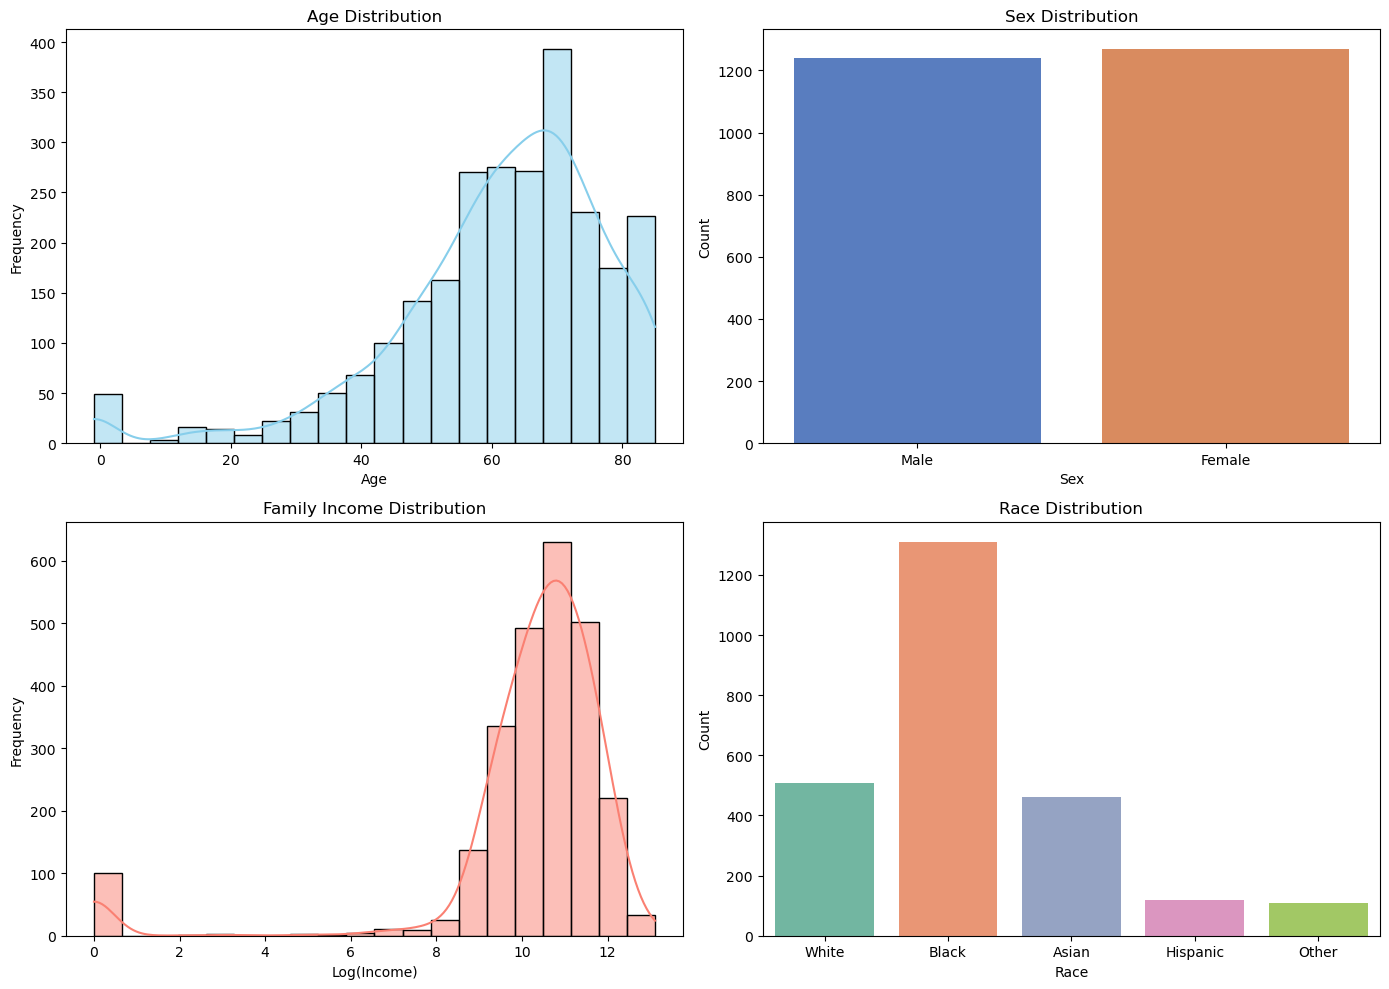

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# 1. Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(diabetes_selected['AGE19X'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Sex Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='SEX', data=diabetes_selected, palette='muted')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.xticks(ticks=np.arange(2), labels=["Male", "Female"])
plt.ylabel('Count')

# 3. Family Income Distribution (log scale for better visualization)
plt.subplot(2, 2, 3)
sns.histplot(np.log1p(diabetes_selected['FAMINC19']), bins=20, kde=True, color='salmon')
plt.title('Family Income Distribution')
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')

# 4. Race Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='RACETHX', data=diabetes_selected, palette='Set2')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.xticks(ticks=np.arange(5), labels=["White", "Black", "Asian", "Hispanic", "Other"])
plt.ylabel('Count')

plt.tight_layout()
plt.show()

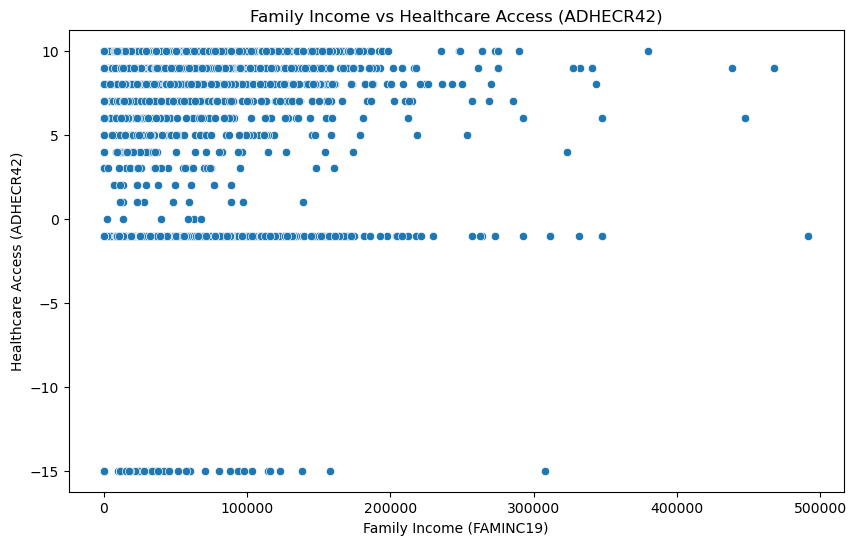

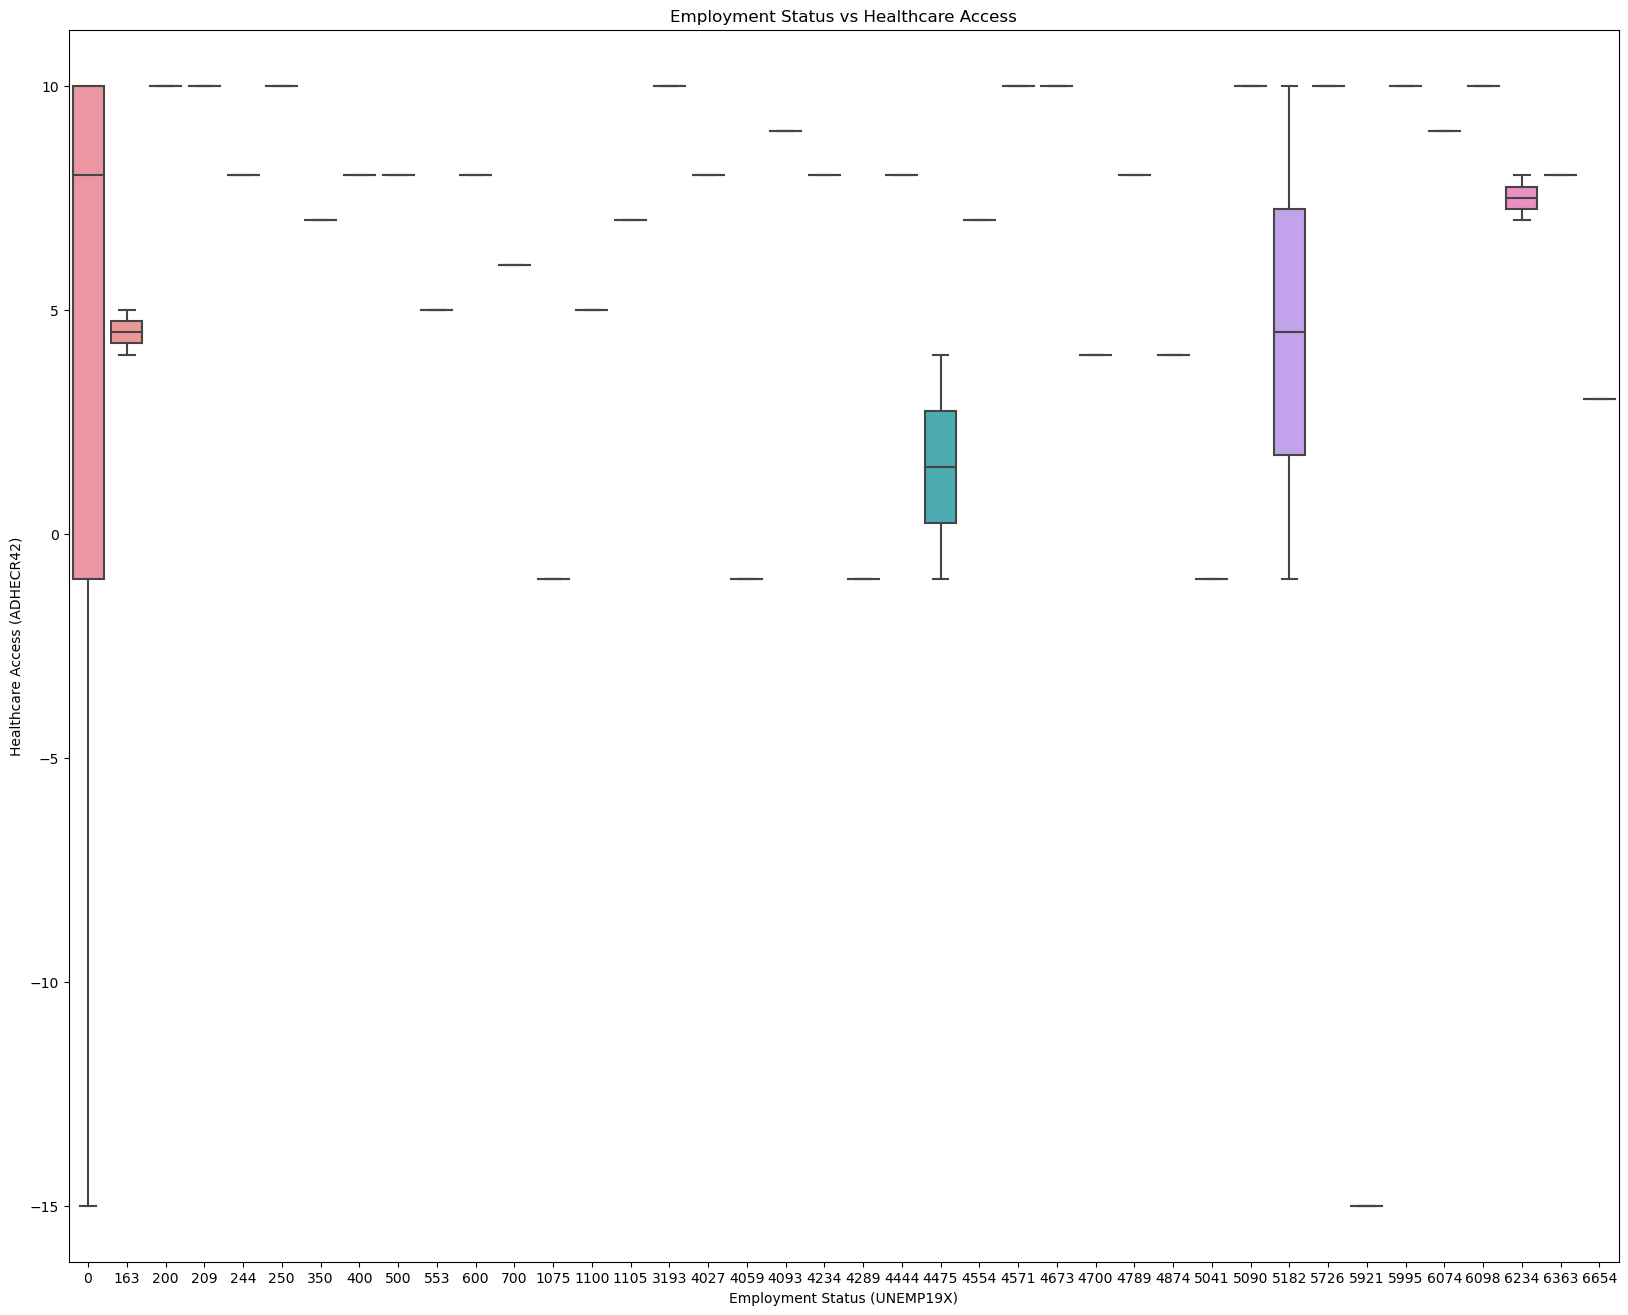

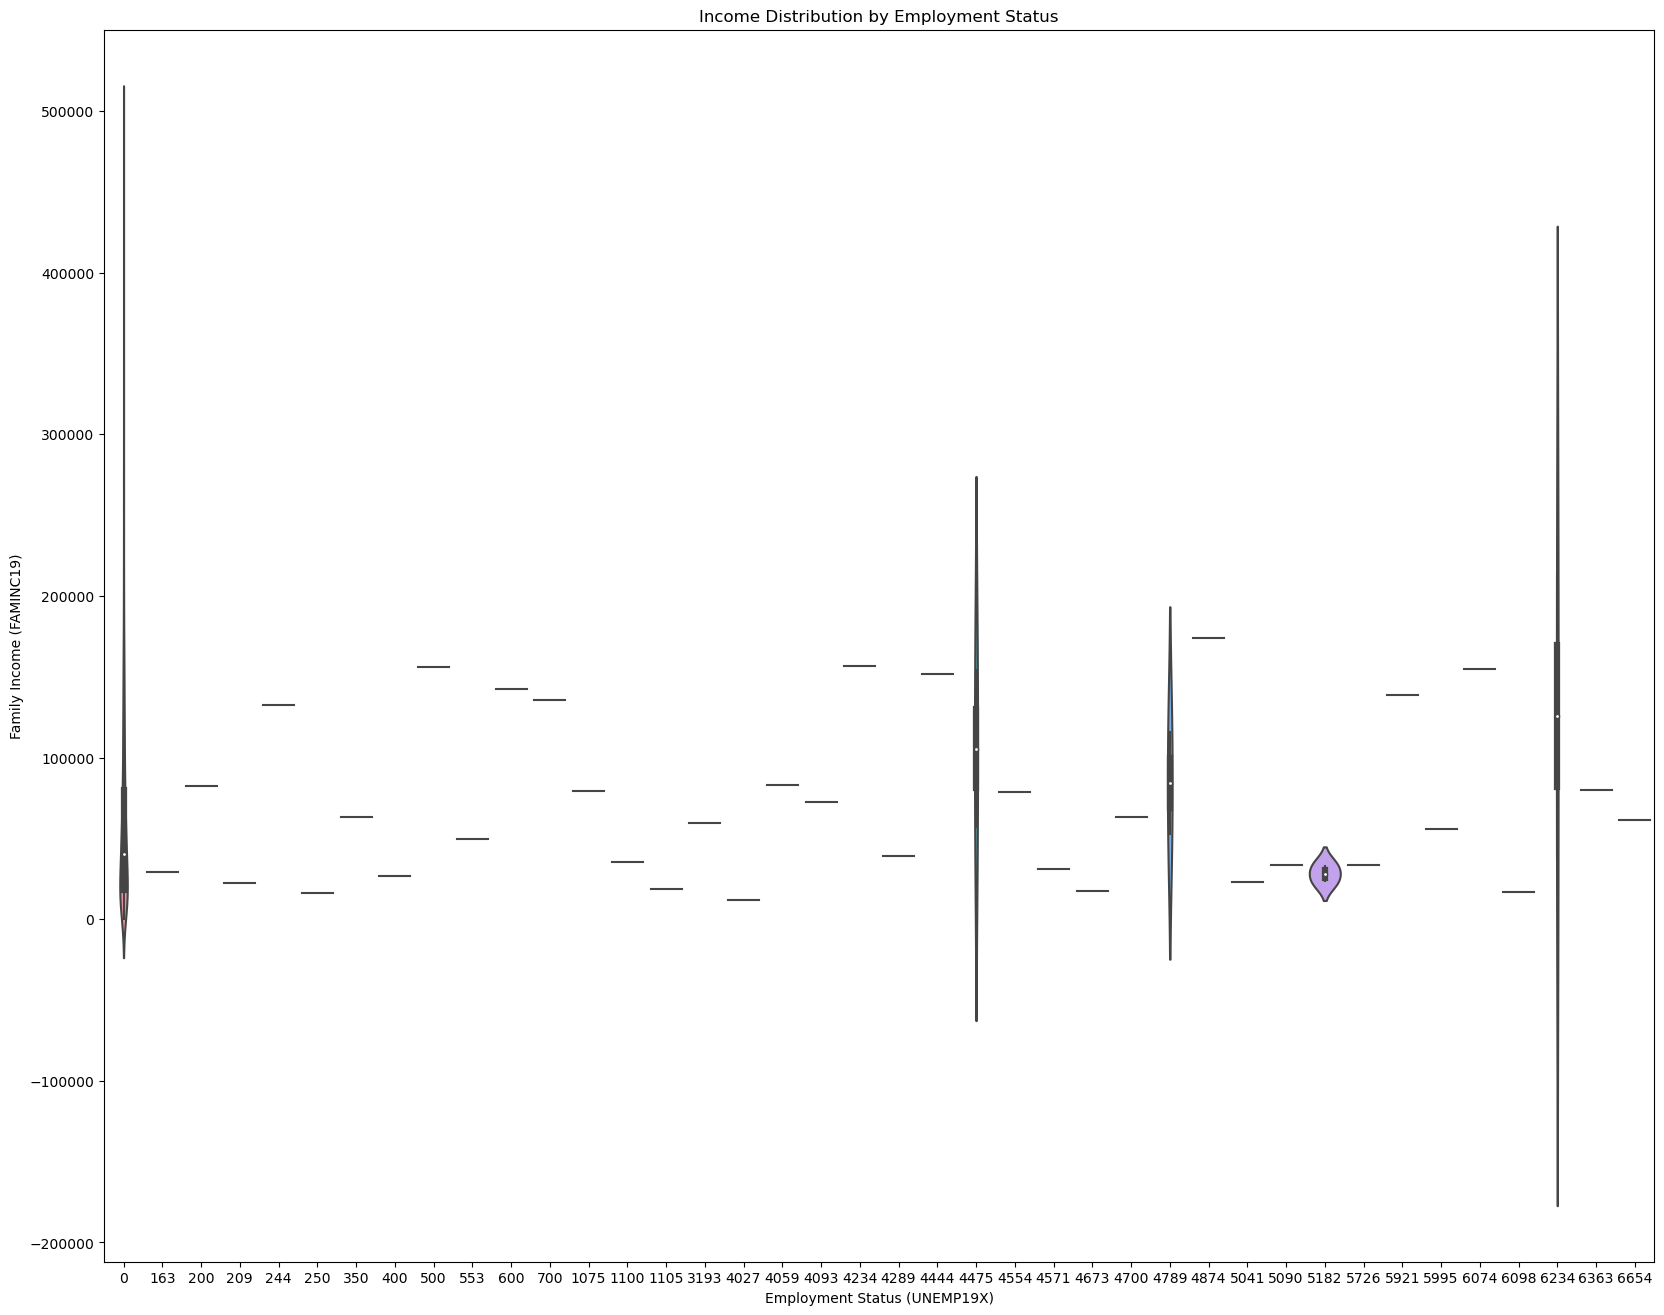

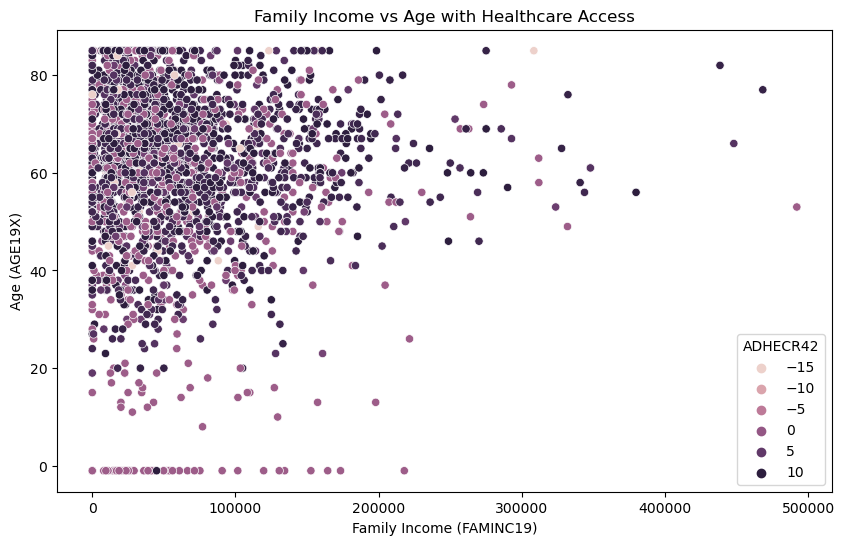

In [46]:

#Income vs. Healthcare Access:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=diabetes_selected['FAMINC19'], y=diabetes_selected['ADHECR42'])
plt.title("Family Income vs Healthcare Access (ADHECR42)")
plt.xlabel("Family Income (FAMINC19)")
plt.ylabel("Healthcare Access (ADHECR42)")
plt.show()
#Employment Status vs. Healthcare Access:
plt.figure(figsize=(20, 16))
sns.boxplot(x='UNEMP19X', y='ADHECR42', data=diabetes_selected)
plt.title("Employment Status vs Healthcare Access")
plt.xlabel("Employment Status (UNEMP19X)")
plt.ylabel("Healthcare Access (ADHECR42)")
plt.show()
#Income Distribution by Employment Status:
plt.figure(figsize=(20, 16))
sns.violinplot(x='UNEMP19X', y='FAMINC19', data=diabetes_selected)
plt.title("Income Distribution by Employment Status")
plt.xlabel("Employment Status (UNEMP19X)")
plt.ylabel("Family Income (FAMINC19)")
plt.show()
#Income vs. Age and Healthcare Access:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAMINC19', y='AGE19X', hue='ADHECR42', data=diabetes_selected)
plt.title("Family Income vs Age with Healthcare Access")
plt.xlabel("Family Income (FAMINC19)")
plt.ylabel("Age (AGE19X)")
plt.show()

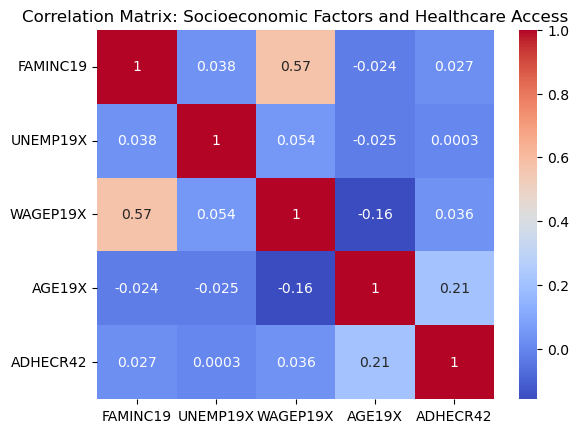

,FAMINC19,UNEMP19X,WAGEP19X,AGE19X,ADHECR42
FAMINC19,1.000000,0.037684,0.572717,-0.023896,0.027029
UNEMP19X,0.037684,1.000000,0.053714,-0.025009,0.000295
WAGEP19X,0.572717,0.053714,1.000000,-0.158108,0.035794
AGE19X,-0.023896,-0.025009,-0.158108,1.000000,0.207912
ADHECR42,0.027029,0.000295,0.035794,0.207912,1.000000


In [47]:
correlation_matrix = diabetes_selected[['FAMINC19', 'UNEMP19X', 'WAGEP19X', 'AGE19X', 'ADHECR42']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Socioeconomic Factors and Healthcare Access")
plt.show()
correlation_matrix = diabetes_selected[['FAMINC19', 'UNEMP19X', 'WAGEP19X', 'AGE19X', 'ADHECR42']].corr()
correlation_matrix 

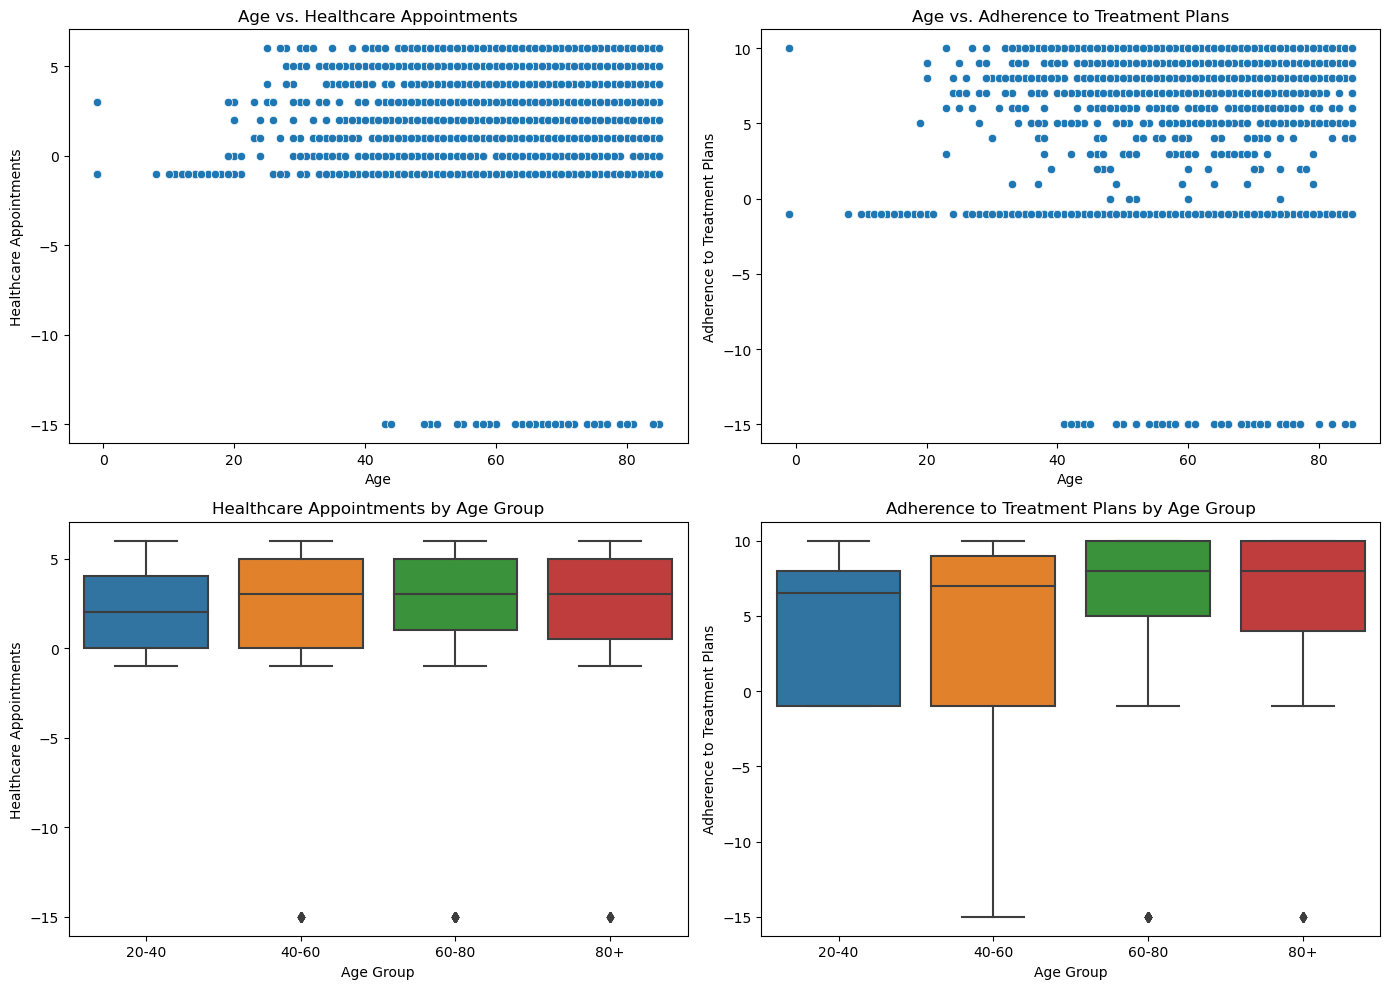

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter Plot of Age vs. Healthcare Appointments (ADAPPT42)
sns.scatterplot(x="AGE19X", y="ADAPPT42", data=diabetes_selected, ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Healthcare Appointments')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Healthcare Appointments')

# Scatter Plot of Age vs. Adherence to Treatment Plans (ADHECR42)
sns.scatterplot(x="AGE19X", y="ADHECR42", data=diabetes_selected, ax=axes[0, 1])
axes[0, 1].set_title('Age vs. Adherence to Treatment Plans')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Adherence to Treatment Plans')

# Boxplot of Healthcare Appointments by Age Group
age_groups = pd.cut(diabetes_selected['AGE19X'], bins=[20, 40, 60, 80, 100], labels=['20-40', '40-60', '60-80', '80+'])
sns.boxplot(x=age_groups, y="ADAPPT42", data=diabetes_selected, ax=axes[1, 0])
axes[1, 0].set_title('Healthcare Appointments by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Healthcare Appointments')

# Boxplot of Adherence to Treatment by Age Group
sns.boxplot(x=age_groups, y="ADHECR42", data=diabetes_selected, ax=axes[1, 1])
axes[1, 1].set_title('Adherence to Treatment Plans by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Adherence to Treatment Plans')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


            AGE19X  ADAPPT42  ADHECR42
AGE19X    1.000000  0.115929  0.207912
ADAPPT42  0.115929  1.000000  0.641229
ADHECR42  0.207912  0.641229  1.000000


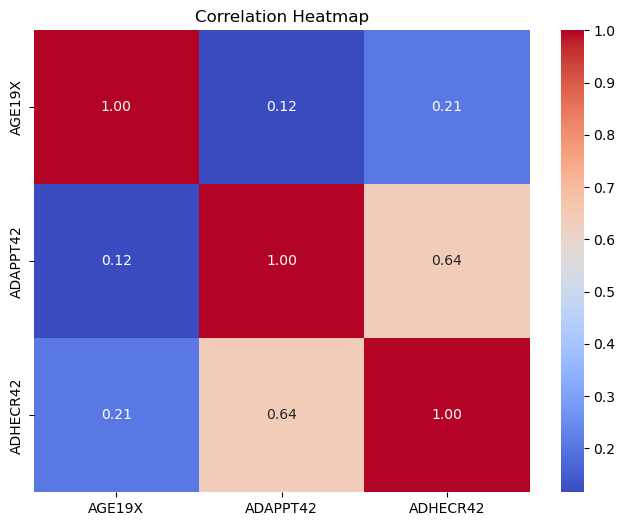

Spearman Correlation between Age and Healthcare Appointments: 0.15
Spearman Correlation between Age and Adherence to Treatment Plans: 0.20


In [49]:
#Step 2: Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = diabetes_selected[["AGE19X", "ADAPPT42", "ADHECR42"]].corr(method='pearson')
correlation_matrix

# Display the correlation matrix
print(correlation_matrix)
#Heatmap of Correlations:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Spearman's rank correlation for non-parametric data
from scipy.stats import spearmanr# Spearman's rank correlation for non-parametric data
spearman_corr_age_appt = spearmanr(diabetes_selected['AGE19X'], diabetes_selected['ADAPPT42'])
spearman_corr_age_adherence = spearmanr(diabetes_selected['AGE19X'], diabetes_selected['ADHECR42'])

print(f"Spearman Correlation between Age and Healthcare Appointments: {spearman_corr_age_appt.correlation:.2f}")
print(f"Spearman Correlation between Age and Adherence to Treatment Plans: {spearman_corr_age_adherence.correlation:.2f}")

In [50]:
# Save the final cleaned and processed dataset
diabetes_selected.to_csv("diabetes_final_dataset.csv", index=False)

print("Final dataset saved as 'diabetes_final_dataset.csv'.")

Final dataset saved as 'diabetes_final_dataset.csv'.
